In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
from scipy.stats import linregress
from sklearn import datasets

# %matplotlib inline
# %matplotlib notebook

# Google developer API key
from config import gkey

# Access maps with unique API key
gmaps.configure(api_key=gkey)

In [2]:
#Read CSV file from Curtis for plots

data_file = ('./Output_data/Exported_combined_data_test.csv')
energy_file = pd.read_csv(data_file)
energy_file

,Unnamed: 0,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date,Ave DNI,Ave GHI,Ave Lat Tilt
0,0,Anáhuac,27.23,-100.15,34.00,49,20,4.60,MX,1596154850,NaN,NaN,NaN
1,1,Pacific Grove,36.62,-121.92,21.11,60,1,4.60,US,1596154630,5.15,5.15,5.15
2,2,Lompoc,34.64,-120.46,20.00,68,2,7.20,US,1596154748,6.33,6.33,6.33
3,3,Pontiac,42.64,-83.29,25.00,50,90,3.10,US,1596154850,3.64,3.64,3.64
4,4,Safford,32.83,-109.71,44.00,7,1,7.20,US,1596154851,7.64,7.64,7.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,331,Ashland,40.82,-82.27,24.00,64,1,4.10,US,1596154900,3.52,3.52,3.52
332,332,Pottstown,40.25,-75.65,29.44,58,1,0.64,US,1596154900,3.91,3.91,3.91
333,333,Cadillac,44.25,-85.40,22.22,53,1,4.60,US,1596154901,3.67,3.67,3.67
334,334,Rancho Palos Verdes,33.74,-118.39,22.78,73,20,7.20,US,1596154901,4.96,4.96,4.96


In [3]:
gmaps.configure(api_key=gkey)

In [5]:
#Storing lat/lng into locations
locations = energy_file[["Lat", "Lng"]].astype(float)

#Convert humidity to float and store
cloudy_locale = energy_file["Cloudiness"].astype(float)

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=cloudy_locale, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [ ]:
#Ave DNI = Annual average Direct Normal Irradiance
#Ave GHI = Annual average Global Horizontal Irradiance
#Ave Lat Tilt = Annual average Tilt at Latitude

#Website documentation
#https://developer.nrel.gov/docs/solar/solar-resource-v1/

#Linear Regression

 the rsquared value is 0.0004974701174062218


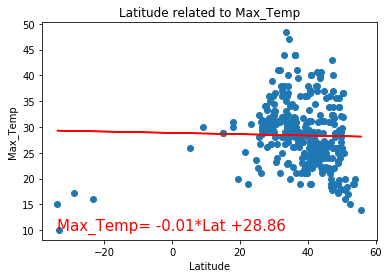

 the rsquared value is 0.019478100052051545


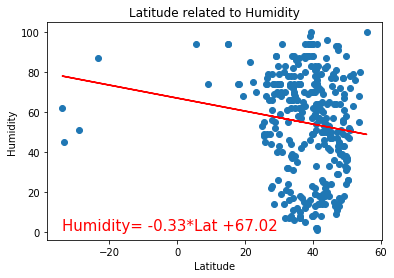

 the rsquared value is 0.009242062380571682


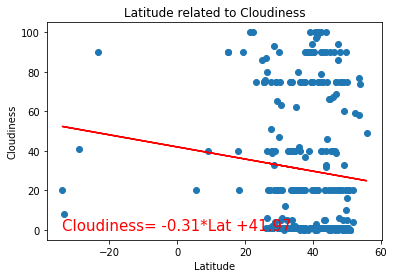

 the rsquared value is 0.03236259991993934


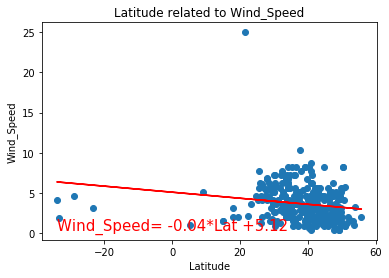

 the rsquared value is nan


C:\Users\brook\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\brook\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\brook\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


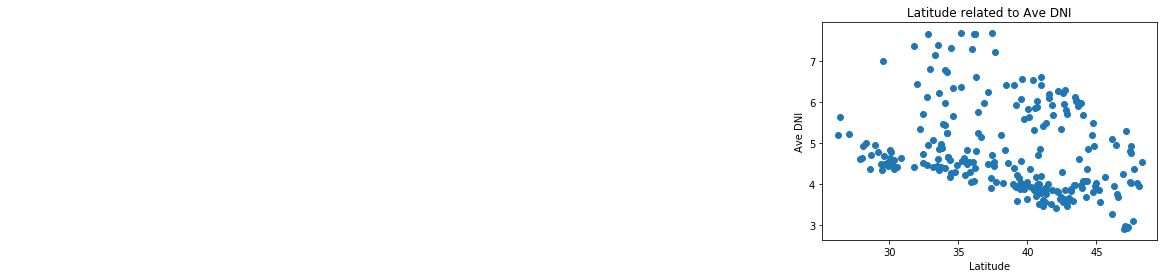

C:\Users\brook\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\brook\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\brook\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


 the rsquared value is nan


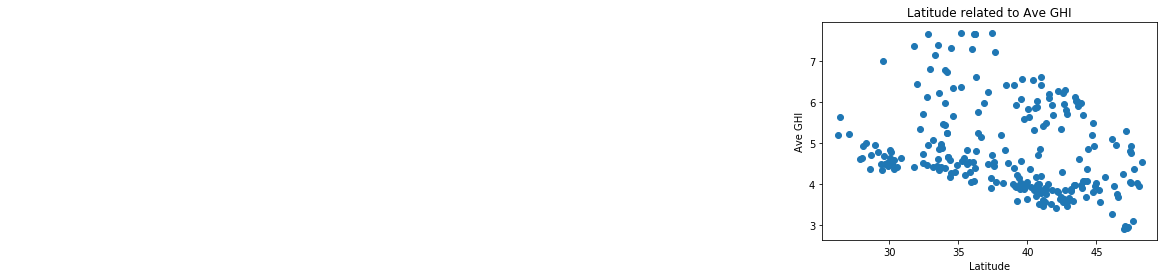

C:\Users\brook\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\brook\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\brook\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


 the rsquared value is nan


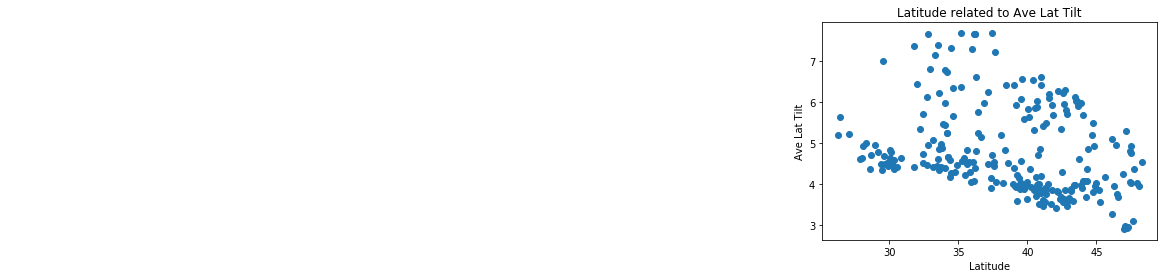

In [4]:
# OPTIONAL: Create a function to create Linear Regression plots
plot_data = energy_file[['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed', 'Ave DNI', 'Ave GHI', 'Ave Lat Tilt']]
yvalues = ['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed', 'Ave DNI', 'Ave GHI', 'Ave Lat Tilt']
# north=weather_data.loc[(weather_data['Lat']>=0)]
xvalue = energy_file['Lat']

for each_variable in yvalues:
    
    yvalue = energy_file[each_variable]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
    regress_values = xvalue * slope + intercept
    line_eq = each_variable+"= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
    plt.scatter(xvalue,yvalue)
    plt.plot(xvalue,regress_values,"r-")
    plt.annotate(line_eq,(xvalue.min(),yvalue.min()),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(each_variable)
    plt.title(f'Latitude related to {each_variable}')
    print(f" the rsquared value is {rvalue**2}")
    plt.show()